<a href="https://colab.research.google.com/github/Mywo960/RevievClassifier/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%8D%D0%BC%D0%BE%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%BE%D0%BA%D1%80%D0%B0%D1%81%D0%BA%D0%B8_%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Определение эмоциональной окраски отзыва**

In [3]:
import sklearn
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install pandas spacy scikit-learn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/movie_reviews.csv")

Двнные из датасета

In [ ]:
data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


## Предварительная обработка текста

Для предварительной обработки используем библиотеку `Spacy`

In [ ]:
import spacy
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Создадим функцию для обработки текста, которая удаляет лишние пробелы, приводит текст к нижнему регистру, удаляет знаки препинания и html-теги.

In [ ]:

import re

загрузим модель spacy

In [ ]:
nlp = spacy.load("en_core_web_md")

In [ ]:
stopwords = nlp.Defaults.stop_words

Функция предобработки текста

In [ ]:
import string
def preprocess_text(text):
    no_html = re.sub('<[^>]*>', '', text)
    doc = nlp(no_html)
    tokens = [token.lower_ for token in doc if token.lower_ not in stopwords and token.lower_ not in string.punctuation]
    doc = nlp(' '.join(tokens))
    return doc

Пример предобработанного текста

In [ ]:
doc = preprocess_text(data["text"][0])

In [ ]:
doc

grew b. 1965 watching loving thunderbirds mates school watched played thunderbirds school lunch school wanted virgil scott wanted alan counting 5 art form took children movie hoping glimpse loved child bitterly disappointing high point snappy theme tune compare original score thunderbirds thankfully early saturday mornings television channel plays reruns series gerry anderson wife created jonatha frakes hand directors chair version completely hopeless waste film utter rubbish cgi remake acceptable replacing marionettes homo sapiens subsp sapiens huge error judgment

Предобрабатываем все отзывы в датасете

In [ ]:
data["text"] = data["text"].apply(preprocess_text)

In [ ]:
data

,text,label
0,"(grew, b., 1965, watching, loving, thunderbird...",0
1,"(movie, dvd, player, sat, coke, chips, expecta...",0
2,"(people, know, particular, time, past, like, f...",0
3,"(great, interest, biblical, movies, bored, dea...",0
4,"(m, die, hard, dads, army, fan, change, got, t...",1
...,...,...
39995,"(western, union, forgotten, classic, western, ...",1
39996,"(movie, incredible, piece, work, explores, noo...",1
39997,"(wife, watched, movie, plan, visit, sicily, st...",0
39998,"(watched, flatliners, amazed, necessary, featu...",1


Сохраняем dataFrame, чтобы не ожидать опять 50 минут

In [ ]:
data.to_csv('preprocessed_data.csv')


### Векторизация

Загружаем предобработанный датасет, чтобы провести векторизацию

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/preprocessed_data.csv")

In [ ]:
data

,Unnamed: 0,text,label
0,0,grew b. 1965 watching loving thunderbirds mate...,0
1,1,movie dvd player sat coke chips expectations h...,0
2,2,people know particular time past like feel nee...,0
3,3,great interest biblical movies bored death min...,0
4,4,m die hard dads army fan change got tapes dvd ...,1
...,...,...,...
39995,39995,western union forgotten classic western reason...,1
39996,39996,movie incredible piece work explores nook cran...,1
39997,39997,wife watched movie plan visit sicily stromboli...,0
39998,39998,watched flatliners amazed necessary features g...,1


Производим векторизацию

In [ ]:

vector_data = data["text"].apply(lambda x: nlp(x).vector)
vector_df = pd.DataFrame(vector_data.tolist())
vector_df["label"] = data["label"]

In [ ]:
vector_df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.871645,-0.430100,-1.073666,-0.944334,1.518533,-0.093973,1.669416,2.325221,-0.520216,-1.117904,...,-1.019608,-0.091769,-0.816661,-0.982368,-0.173001,1.371957,0.009018,-1.984979,0.354836,0
1,-0.713353,0.470564,-1.594450,-1.351791,0.824423,-0.025467,2.303139,2.642055,-1.017740,-1.157883,...,-2.035710,1.346446,-0.870832,-0.870715,-0.553346,1.146265,-0.081462,-2.684102,0.589193,0
2,-0.288987,1.059520,-2.245722,-1.098926,1.110138,0.262550,2.221195,2.376752,-1.545332,0.060500,...,-1.591914,0.702041,-1.073112,-1.548260,-1.086844,0.614631,0.634947,-2.550878,0.885854,0
3,-0.405503,0.018113,-2.041562,-1.733175,0.815001,0.617408,3.438051,2.739913,-1.115116,-1.074689,...,-2.629650,1.895674,-1.450702,-2.041648,-0.727359,1.678415,-0.325667,-2.843422,0.642146,0
4,-1.764627,0.691709,-1.786582,-0.072980,0.673429,0.327447,1.559824,3.157531,-1.300503,-0.194128,...,-0.738894,0.543954,-0.784695,-1.404450,-0.333272,0.724944,-0.576640,-2.180638,0.767356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.385540,-0.198968,-1.105264,-0.497864,2.005416,-0.005844,1.528528,2.386731,-0.061181,-0.241087,...,-0.561735,-0.244790,0.097415,-1.194441,-0.029732,0.595430,-0.909249,-1.601974,0.870139,1
39996,-0.598984,0.391464,-2.700500,-1.396669,1.656050,0.037552,2.004149,2.711235,-1.530571,-0.069772,...,-1.060708,0.557538,-1.419123,-1.698128,-0.597780,1.209037,-0.290790,-3.055120,0.877108,1
39997,-0.609162,0.216183,-1.486869,-0.900911,1.798035,0.262957,1.842131,2.557925,-0.794474,-0.478319,...,-0.923001,0.772843,-0.447056,-0.717039,-0.052584,1.022664,-0.802176,-1.877582,0.780510,0
39998,-0.819432,-0.241855,-1.452400,-0.882431,1.580851,0.102532,1.758079,2.773324,-1.210347,-0.925331,...,-0.974321,0.414229,-0.872755,-0.513764,-0.106388,0.629593,0.154499,-1.948813,0.835868,1


Сохраняем полностью предобработанный датасет

In [ ]:
vector_df.to_csv("vector_data.csv")

## Модель

Загружаем датасет и подготавливаем данные для обучения модели

In [5]:
import pandas as pd

In [6]:
vector_df = pd.read_csv("/content/drive/MyDrive/vector_data.csv")

In [7]:
from sklearn.model_selection import train_test_split

# Выделим признаки X и целевой признак y
X = vector_df.drop(columns=["label","Unnamed: 0"])
y = vector_df["label"]

# Делим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.871645,-0.430100,-1.073666,-0.944334,1.518533,-0.093973,1.669416,2.325221,-0.520216,-1.117904,...,1.089962,-1.019608,-0.091769,-0.816661,-0.982368,-0.173001,1.371957,0.009018,-1.984979,0.354836
1,-0.713353,0.470564,-1.594450,-1.351791,0.824423,-0.025467,2.303139,2.642055,-1.017740,-1.157883,...,0.830295,-2.035710,1.346446,-0.870832,-0.870715,-0.553346,1.146265,-0.081462,-2.684102,0.589193
2,-0.288987,1.059520,-2.245722,-1.098926,1.110138,0.262550,2.221195,2.376752,-1.545332,0.060500,...,1.168662,-1.591914,0.702041,-1.073112,-1.548260,-1.086844,0.614631,0.634947,-2.550878,0.885854
3,-0.405503,0.018113,-2.041562,-1.733175,0.815001,0.617408,3.438051,2.739913,-1.115116,-1.074689,...,0.654298,-2.629650,1.895674,-1.450702,-2.041648,-0.727359,1.678415,-0.325667,-2.843422,0.642146
4,-1.764627,0.691709,-1.786582,-0.072980,0.673429,0.327447,1.559824,3.157531,-1.300503,-0.194128,...,0.781413,-0.738894,0.543954,-0.784695,-1.404450,-0.333272,0.724944,-0.576640,-2.180638,0.767356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.385540,-0.198968,-1.105264,-0.497864,2.005416,-0.005844,1.528528,2.386731,-0.061181,-0.241087,...,0.617657,-0.561735,-0.244790,0.097415,-1.194441,-0.029732,0.595430,-0.909249,-1.601974,0.870139
39996,-0.598984,0.391464,-2.700500,-1.396669,1.656050,0.037552,2.004149,2.711235,-1.530571,-0.069772,...,1.015295,-1.060708,0.557538,-1.419123,-1.698128,-0.597780,1.209037,-0.290790,-3.055119,0.877108
39997,-0.609162,0.216183,-1.486869,-0.900911,1.798035,0.262957,1.842131,2.557925,-0.794474,-0.478319,...,0.957901,-0.923001,0.772843,-0.447056,-0.717039,-0.052584,1.022664,-0.802176,-1.877582,0.780510
39998,-0.819432,-0.241855,-1.452400,-0.882431,1.580851,0.102532,1.758079,2.773325,-1.210347,-0.925331,...,0.868978,-0.974321,0.414229,-0.872755,-0.513764,-0.106388,0.629593,0.154499,-1.948813,0.835868


In [ ]:
y

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64

### KNN


Для начала обучим модель KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier


In [10]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [11]:
knn.predict([X_test.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [12]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      5005
           1       0.74      0.71      0.72      4995

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



Как можно заметить, KNN показывает достаточно маленькую точность. Продолжим обучать другие модели.

### Логистическая регрессия

Обучим модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5005
           1       0.82      0.83      0.82      4995

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

[[4080  925]
 [ 844 4151]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Как можно заметить, логистическая регрессия показала самый хороший результат по сравнению со всему остальными моделями. Сохраняем модель

In [ ]:
import pickle
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [ ]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5005
           1       0.83      0.83      0.83      4995

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

[[4128  877]
 [ 856 4139]]


### Деревья принятия решений

Обучим модель деревьев принятия решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
print(classification_report(y_test, dt.predict(X_test)))
print(confusion_matrix(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      5005
           1       0.65      0.66      0.65      4995

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

[[3252 1753]
 [1719 3276]]


Как можно заметить, логистическая регрессия показала лучший результат.

### Бэггинг + Бустинг

Обучим модели бэггинга и бустинга

In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [ ]:
bag = BaggingClassifier().fit(X_train, y_train)
print(classification_report(y_test, bag.predict(X_test)))
print(confusion_matrix(y_test, bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5005
           1       0.75      0.68      0.71      4995

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

[[3893 1112]
 [1598 3397]]


In [ ]:
gb = GradientBoostingClassifier().fit(X_train, y_train)
print(classification_report(y_test, gb.predict(X_test)))
print(confusion_matrix(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      5005
           1       0.78      0.79      0.78      4995

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

[[3902 1103]
 [1066 3929]]


Бэггинг и бустинг показали худший результат, чем логистическая регрессия

## Интерфейс

Для реализации интерфейса используем библиатеку `streamlit`

In [ ]:
! pip install streamlit -q


In [ ]:
!wget -q -O - ipv4.icanhazip.com

104.197.43.104


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.197.43.104:8501

npx: installed 22 in 3.601s
your url is: https://tired-jeans-press.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
  Stopping...
^C


Код `app.py` , в котором реализован весь интерфейс

In [ ]:
import streamlit as st
import pickle
import spacy
import re
import string
import pandas as pd

# загрузка модели
with open('/content/model.pkl', 'rb') as f:
    model = pickle.load(f)
nlp = spacy.load("en_core_web_md")
stopwords = nlp.Defaults.stop_words

#предобработка текста
def preprocess_text(text):
    # Удаление HTML-тегов
    no_html = re.sub('<[^>]*>', '', text)
    # Обработка текста с помощью Spacy
    doc = nlp(no_html)
    # Удаление стоп-слов и пунктуации
    tokens = [token.lower_ for token in doc if token.lower_ not in stopwords and token.lower_ not in string.punctuation]
    # Возврат обработанного документа Spacy
    doc = nlp(' '.join(tokens))
    return doc


st.write('# Определение эмоциональной тональности')
user_input = st.text_area("Введите ваш отзыв здесь")

if st.button("Определить тональность"):
    if user_input.strip() == "":
        st.warning("Пожалуйста, введите отзыв.")
    else:
        # Прогнозирование тональности
        doc = preprocess_text(user_input.strip())
        vector_data = doc.vector
        vector_df = pd.DataFrame(vector_data.tolist())
        answer = model.predict(vector_df.T)
        if answer == 1:
            st.success("Этот отзыв положительный!")
        else:
            st.error("Этот отзыв отрицательный.")



Результат при вводе хорошего отзыва

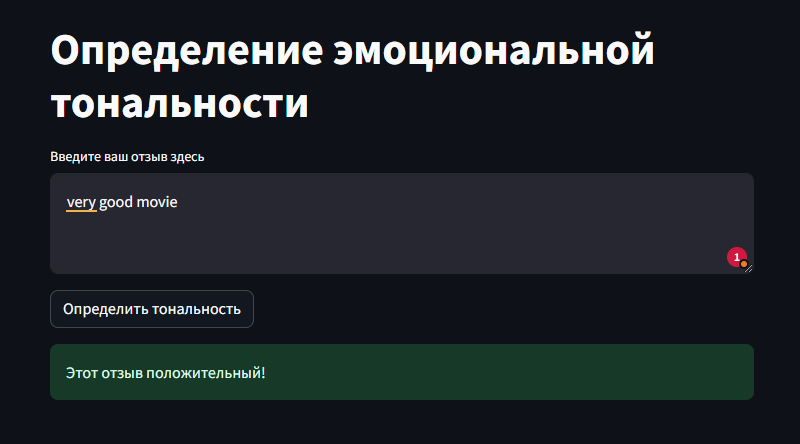

Результат при вводе плохого отзыва

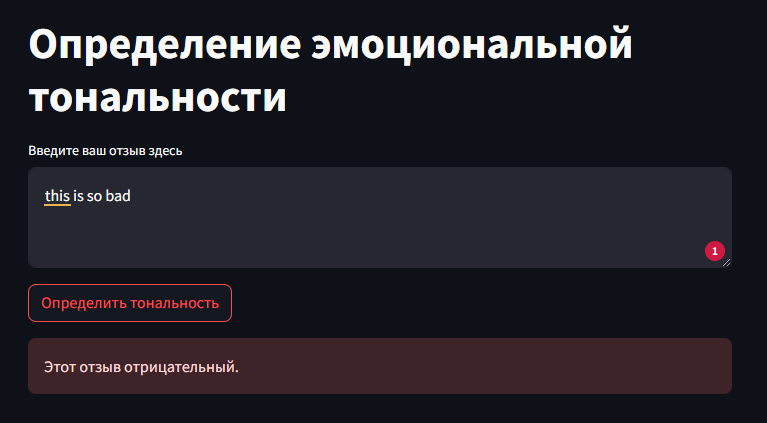